In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
dem = pd.read_csv('dem_candidates.csv')
rep = pd.read_csv('rep_candidates.csv')

Predicting presidential political endorsements based on political views/demographics/local endorsements

In [3]:
dem.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

In [6]:
dem_important = dem[['Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'Emily Endorsed?']].fillna(0).replace({'No': -1, 'Yes': 1})
dem_pred = dem_endorse[['Biden Endorsed?',  'Warren Endorsed? ', 'Sanders Endorsed?']]

In [17]:
dem_important[
    (dem_important['Sanders Endorsed?'] == 1) 
]

,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Emily Endorsed?
109,0,0,1,1,0,1,0,1,0,1
147,0,0,1,1,0,0,0,0,0,-1
188,0,0,1,1,0,0,0,0,0,-1
235,0,0,1,1,1,1,-1,0,0,-1
241,0,0,1,1,1,0,0,0,0,0
261,0,0,1,1,1,0,0,1,0,-1
293,0,0,1,1,1,1,0,0,0,-1
574,0,0,1,1,1,0,0,1,0,0
602,0,0,1,0,1,1,0,1,0,0


In [14]:
dem_important[
    (dem_important['Biden Endorsed?'] == -1) |
#     (dem_important['Warren Endorsed? '] == -1) |
#     (dem_important['Sanders Endorsed?'] == -1) 
]

,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Emily Endorsed?
73,0,-1,0,-1,0,-1,0,0,0,-1
74,0,-1,0,-1,0,-1,0,0,0,-1
76,0,-1,0,1,0,-1,0,0,0,-1
110,0,0,-1,-1,0,-1,0,-1,0,-1
142,-1,0,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...
492,0,-1,0,-1,0,0,0,0,0,0
493,0,-1,0,-1,0,0,0,0,0,0
495,0,-1,0,-1,0,0,0,0,0,0
654,-1,0,0,0,0,0,0,0,0,0


In [38]:
# set(dem_endorse.iloc[:, 0])
set(dem_pred.iloc[:, 0])

{-1, '0', 1}

In [39]:
dem_endorse

,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Emily Endorsed?
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
806,0,0,0,0,0,0,0,0,-1,0
807,0,0,0,0,0,0,0,-1,-1,0
808,0,0,0,0,0,0,0,-1,-1,0
809,0,0,0,0,0,0,0,1,1,0


In [43]:
# EDA
dem_endorse[['Biden Endorsed?', 'Warren Endorsed? ','Sanders Endorsed?']].value_counts()

Biden Endorsed?  Warren Endorsed?   Sanders Endorsed?
0                0                  0                    717
-1               0                  0                     29
0                -1                 0                     21
                 0                  -1                    20
1                0                  0                     10
0                0                  1                      9
                 1                  0                      5
dtype: int64

In [44]:
dem_endorse[['Biden Endorsed?', 'Our Revolution Endorsed?', 'Justice Dems Endorsed?']].value_counts()

Biden Endorsed?  Our Revolution Endorsed?  Justice Dems Endorsed?
0                0                         0                         399
                 -1                        0                         133
                                           -1                         89
                 1                         0                          51
                 0                         -1                         48
                 1                         1                          26
                 0                         1                          17
-1               0                         0                          16
1                0                         0                           7
0                1                         -1                          5
-1               -1                        -1                          5
                                           0                           4
0                -1                        1              

In [45]:
dem_endorse[dem_endorse['Warren Endorsed? '] == 1]

,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Emily Endorsed?
75,0,1,0,1,0,1,0,0,0,1
176,0,1,0,-1,0,0,0,0,0,1
226,0,1,0,0,-1,1,0,1,0,1
416,0,1,0,-1,-1,0,0,-1,-1,1
494,0,1,0,-1,0,0,0,0,0,0


In [46]:
dem_endorse[dem_endorse['Biden Endorsed?'] == 1]

,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Emily Endorsed?
141,1,0,0,0,0,0,0,0,0,1
165,1,0,0,0,0,0,0,0,1,0
326,1,0,0,0,0,0,0,0,0,1
397,1,0,0,0,0,0,0,0,1,1
404,1,0,0,0,0,1,0,1,0,0
409,1,0,0,-1,-1,0,0,0,0,0
439,1,0,0,0,0,0,0,0,0,1
445,1,0,0,-1,-1,0,0,0,0,0
450,1,0,0,-1,0,0,0,0,0,1
656,1,0,0,0,0,0,0,0,0,0


In [47]:
dem_endorse[dem_endorse['Sanders Endorsed?'] == 1]

,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Emily Endorsed?
109,0,0,1,1,0,1,0,1,0,1
147,0,0,1,1,0,0,0,0,0,-1
188,0,0,1,1,0,0,0,0,0,-1
235,0,0,1,1,1,1,-1,0,0,-1
241,0,0,1,1,1,0,0,0,0,0
261,0,0,1,1,1,0,0,1,0,-1
293,0,0,1,1,1,1,0,0,0,-1
574,0,0,1,1,1,0,0,1,0,0
602,0,0,1,0,1,1,0,1,0,0


In [61]:
dem_important[dem_important['Our Revolution Endorsed?'] == -1]

,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Emily Endorsed?
26,0,0,0,-1,-1,0,0,0,0,0
27,0,0,0,-1,0,0,0,0,0,0
28,0,0,0,-1,0,0,0,0,0,0
29,0,0,0,-1,0,0,0,0,0,0
30,0,0,0,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
793,0,0,0,-1,-1,0,-1,0,0,-1
795,0,0,0,-1,-1,0,-1,0,0,-1
799,0,0,0,-1,0,0,-1,0,0,1
800,0,0,0,-1,0,0,-1,0,0,-1


In [77]:
dem_endorse = dem[['Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'Emily Endorsed?']].fillna(0).replace({'No': -1, 'Yes': 1})

[Text(131.86698113207547, 209.6742857142857, 'X[6] <= -0.5\ngini = 0.092\nsamples = 811\nvalue = [29, 772, 10]'),
 Text(25.267924528301887, 194.14285714285714, 'X[1] <= -0.5\ngini = 0.195\nsamples = 174\nvalue = [19, 155, 0]'),
 Text(18.950943396226414, 178.61142857142858, 'gini = 0.0\nsamples = 57\nvalue = [0, 57, 0]'),
 Text(31.58490566037736, 178.61142857142858, 'X[5] <= -0.5\ngini = 0.272\nsamples = 117\nvalue = [19, 98, 0]'),
 Text(18.950943396226414, 163.07999999999998, 'X[3] <= -0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8, 0]'),
 Text(12.633962264150943, 147.54857142857142, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(25.267924528301887, 147.54857142857142, 'X[1] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4, 0]'),
 Text(18.950943396226414, 132.01714285714286, 'X[4] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2, 0]'),
 Text(12.633962264150943, 116.48571428571428, 'X[0] <= -0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(6.316981132075472, 100.95428571428

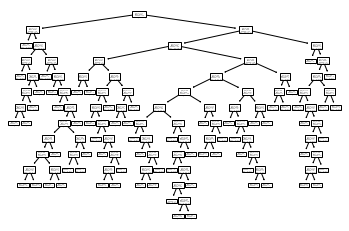

In [78]:
# sum across biden, warren, sanders
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(dem_endorse, dem_pred)
tree.plot_tree(clf) 

In [79]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                  feature_names=dem_endorse.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 


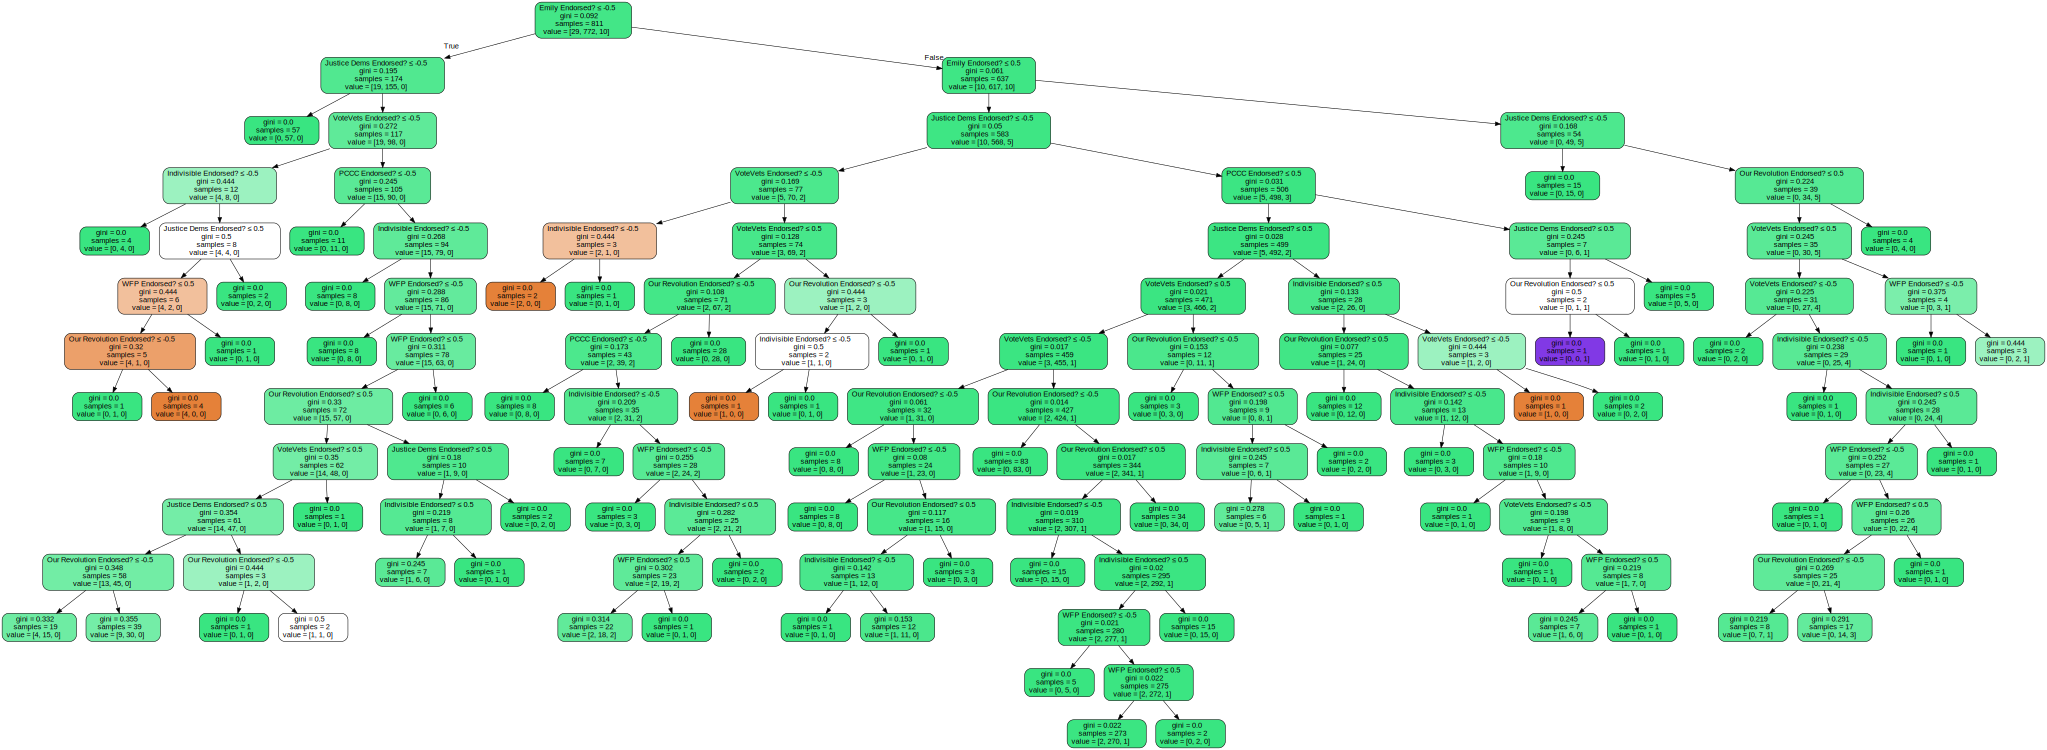

In [80]:
graph

In [12]:

clf = LinearRegression()
clf.fit(dem_endorse,
        dem_pred)

LinearRegression()

In [13]:
log_reg = sm.Logit(dem_pred, dem_endorse).fit()


         Current function value: 0.539446
         Iterations: 35


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [14]:
print(log_reg.summary())


                           Logit Regression Results                           
Dep. Variable:        Biden Endorsed?   No. Observations:                  811
Model:                          Logit   Df Residuals:                      802
Method:                           MLE   Df Model:                            8
Date:                Fri, 07 May 2021   Pseudo R-squ.:                  -7.117
Time:                        16:57:34   Log-Likelihood:                -437.49
converged:                      False   LL-Null:                       -53.895
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Warren Endorsed?           -26.1839   4.17e+05  -6.29e-05      1.000   -8.16e+05    8.16e+05
Sanders Endorsed?           -0.4859   7.72e+04  -6.29e-06      1.000   -1.51e+05    1.51e